In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
df_students = pd.read_csv("mydata.csv")
print(df_claimants.head(10))
print(df_claimants.shape)

   Unnamed: 0  admit  gre   gpa  rank
0           1      0  380  3.61     3
1           2      1  660  3.67     3
2           3      1  800  4.00     1
3           4      1  640  3.19     4
4           5      0  520  2.93     4
5           6      1  760  3.00     2
6           7      1  560  2.98     1
7           8      0  400  3.08     2
8           9      1  540  3.39     3
9          10      0  700  3.92     2
(400, 5)


In [4]:
df_students.isna().sum()

Unnamed: 0    0
admit         0
gre           0
gpa           0
rank          0
dtype: int64

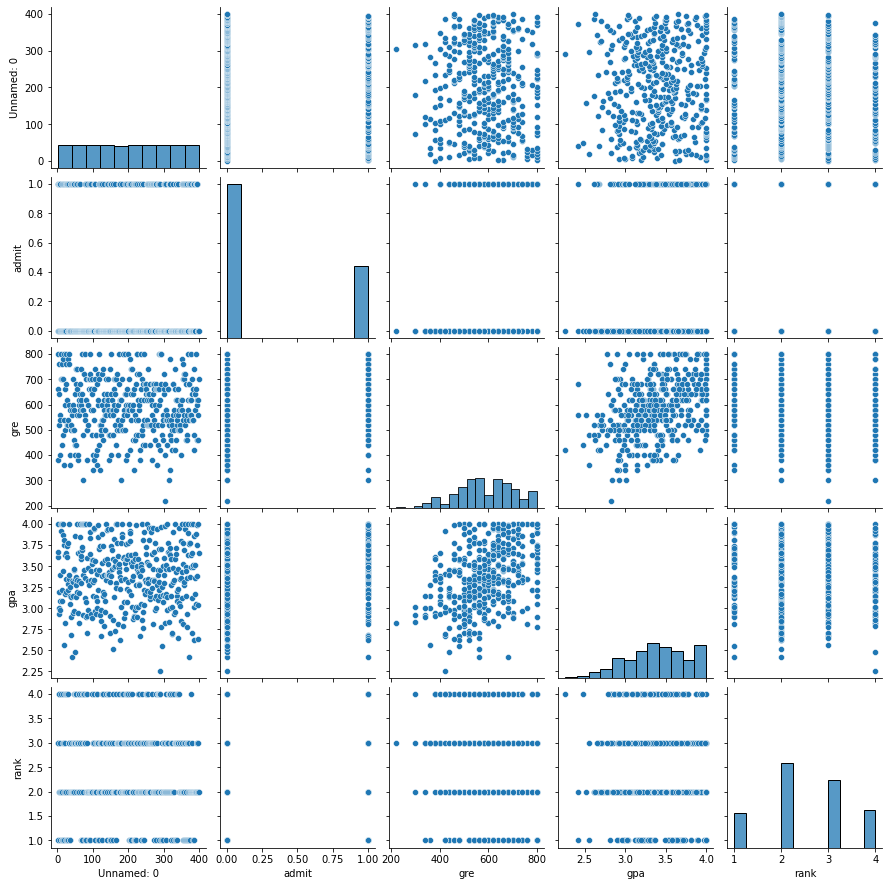

In [6]:
sns.pairplot(df_students)

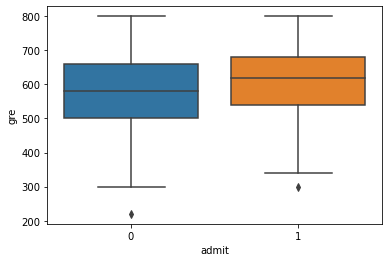

In [7]:
sns.boxplot(data=df_claimants, x="admit", y = "gre")

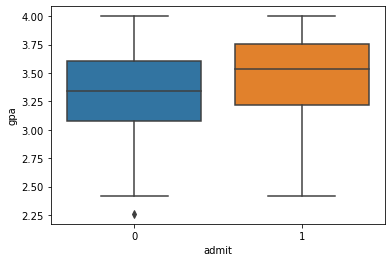

In [8]:
sns.boxplot(data=df_claimants, x="admit", y = "gpa")

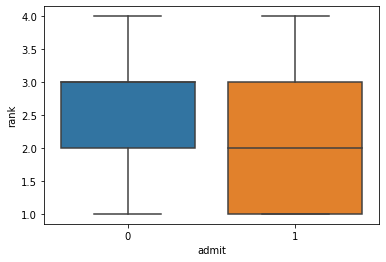

In [9]:
sns.boxplot(data=df_claimants, x="admit", y = "rank")

In [12]:
X_cols = ["gre", "gpa", "rank"]

In [13]:
from sklearn.model_selection import train_test_split
X = df_students[X_cols]
y=df_students["admit"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 789)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 3)
(320,)
(80, 3)
(80,)


In [15]:
#model = smf.logit(formula="ATTORNEY ~ CLMSEX + CLMINSUR + SEATBELT + CLMAGE + LOSS ", data=df_claimants1)
results = sm.Logit(y_train, X_train).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.572566
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                 0.07442
Time:                        15:18:12   Log-Likelihood:                -183.22
converged:                       True   LL-Null:                       -197.95
Covariance Type:            nonrobust   LLR p-value:                 4.004e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      1.937      0.053   -2.77e-05       0.005
gpa           -0.1408      0.

coef : the coefficients of the independent variables in the regression equation.
Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

In [22]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.151     
Dependent Variable: ATTORNEY         AIC:              1037.7274 
Date:               2022-03-16 10:28 BIC:              1061.6042 
No. Observations:   876              Log-Likelihood:   -513.86   
Df Model:           4                LL-Null:          -605.28   
Df Residuals:       871              LLR p-value:      1.8455e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
CLMSEX        0.3972    0.1468    2.7050  0.0068   0.1094   0.6850
CLMINSUR      0.4792    0.1542    3.1083  0.0019   0.1770   0.7813
SEATBELT     -1.2665    0.6765   -1.8721  0.0612  -2.5925   0.0594
CLMAGE        0.0047    0.0035    1.3279  0.1842  -0.0022   0.0115
LOSS         -0.3833    0.0381  -10.0641  0.0000  -0.4579  -0.3086
=================================================================

"""

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
yhat = results.predict(X_test)
print(yhat)

29     0.512171
146    0.317226
87     0.378305
174    0.104318
28     0.490363
         ...   
3      0.144999
247    0.304099
74     0.164709
218    0.487954
179    0.137133
Length: 80, dtype: float64


In [17]:
prediction_50 = list(map(round, yhat)) ##cutoff at 0.5

In [18]:
df_results = pd.DataFrame({"y_test":y_test,
                           "pred_prob": yhat,
                            "prediction_50": prediction_50})
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_50)
accuracy_score(y_test, df_results.prediction_50)
print(classification_report(y_test, df_results.prediction_50))

array([[48,  4],
       [21,  7]], dtype=int64)

0.6875

              precision    recall  f1-score   support

           0       0.70      0.92      0.79        52
           1       0.64      0.25      0.36        28

    accuracy                           0.69        80
   macro avg       0.67      0.59      0.58        80
weighted avg       0.67      0.69      0.64        80



In [19]:
df_results["prediction_25"] = df_results.pred_prob.map(lambda x: 1 if x > 0.25 else 0)
df_results["prediction_75"] = df_results.pred_prob.map(lambda x: 1 if x > 0.75 else 0)
df_results["prediction_60"] = df_results.pred_prob.map(lambda x: 1 if x > 0.6 else 0)
df_results.head()
    

,y_test,pred_prob,prediction_50,prediction_25,prediction_75,prediction_60
29,0,0.512171,1,1,0,0
146,0,0.317226,0,1,0,0
87,0,0.378305,0,1,0,0
174,0,0.104318,0,0,0,0
28,1,0.490363,0,1,0,0


In [20]:
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_25)
accuracy_score(y_test, df_results.prediction_25)
print(classification_report(y_test, df_results.prediction_25))

array([[17, 35],
       [ 8, 20]], dtype=int64)

0.4625

              precision    recall  f1-score   support

           0       0.68      0.33      0.44        52
           1       0.36      0.71      0.48        28

    accuracy                           0.46        80
   macro avg       0.52      0.52      0.46        80
weighted avg       0.57      0.46      0.46        80



In [21]:
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_75)
accuracy_score(y_test, df_results.prediction_75)
print(classification_report(y_test, df_results.prediction_75))

array([[52,  0],
       [28,  0]], dtype=int64)

0.65

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [22]:
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_60)
accuracy_score(y_test, df_results.prediction_60)
print(classification_report(y_test, df_results.prediction_60))

array([[50,  2],
       [25,  3]], dtype=int64)

0.6625

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        52
           1       0.60      0.11      0.18        28

    accuracy                           0.66        80
   macro avg       0.63      0.53      0.48        80
weighted avg       0.64      0.66      0.58        80



In [23]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(df_results.y_test, df_results.pred_prob)
gini = 2*(roc_score-0.5)
print(roc_score)
print(gini)

0.6057692307692307
0.21153846153846145


In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_proba = LR.predict_proba(X_test)

LogisticRegression()

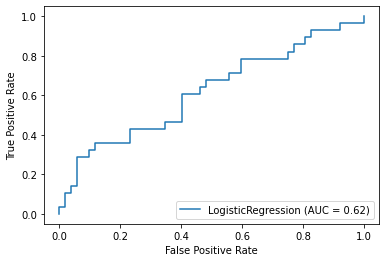

In [26]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, X_test, y_test)
plt.show()


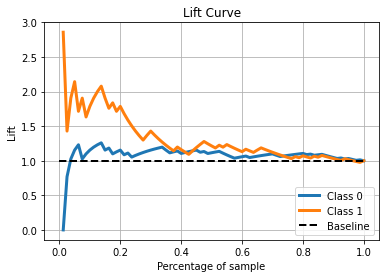

In [31]:
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=y_pred_proba)